In [1]:
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox, TransformedBbox, blended_transform_factory
from mpl_toolkits.axes_grid1.inset_locator import (
    BboxPatch, BboxConnector, BboxConnectorPatch
)

In [2]:
def connect_bbox(bbox1, bbox2, loc1a, loc2a, loc1b, loc2b, prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = {
            **prop_lines,
            "alpha": prop_lines.get("alpha", 1) * 0.2,
            "clip_on": False,
        }
    
    c1 = BboxConnector(bbox1, bbox2, loc1=loc1a, loc2=loc2a, clip_on=False, **prop_lines)
    c2 = BboxConnector(bbox1, bbox2, loc1=loc1b, loc2=loc2b, clip_on=False, **prop_lines)
    
    bbox_patch_1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch_2 = BboxPatch(bbox2, **prop_patches)
    
    p = BboxConnectorPatch(
        bbox1, bbox2, loc1a=loc1a, loc2a=loc2a,
        loc1b=loc1b, loc2b=loc2b, clip_on=False, **prop_patches,
    )
    
    return c1, c2, bbox_patch_1, bbox_patch_2, p

In [3]:
def zoom_effect_1(ax1, ax2, xmin, xmax, **kwargs):
    """
    Connect *ax1* and *ax2*. The *xmin*-to-*xmax* range in both axes will
    be marked.
    
    Parameters
    ----------
    ax1
        The main axes.
    ax2
        The zoomed axes.
    xmin, xmax
        The limits of the colored area in both plot axes.
    **kwargs
        Arguments passed to the patch constructor.
    """
    bbox = Bbox.from_extents(xmin, 0, xmax, 1)
    
    mybbox1 = TransformedBbox(bbox, ax1.get_xaxis_transform())
    mybbox2 = TransformedBbox(bbox, ax2.get_xaxis_transform())
    
    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}
    
    c1, c2, bbox_patch_1, bbox_patch_2, p = connect_bbox(
        mybbox1, mybbox2, loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches,
    )
    
    ax1.add_patch(bbox_patch_1)
    ax2.add_patch(bbox_patch_2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)
    
    return c1, c2, bbox_patch_1, bbox_patch_2, p

In [4]:
def zoom_effect_2(ax1, ax2, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes
    
    Similar to zoom_effect_1.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """
    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)
    
    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)
    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}
    
    c1, c2, bbox_patch_1, bbox_patch_2, p = connect_bbox(
        mybbox1, mybbox2, loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches,
    )
    
    ax1.add_patch(bbox_patch_1)
    ax2.add_patch(bbox_patch_2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)
    
    return c1, c2, bbox_patch_1, bbox_patch_2, p

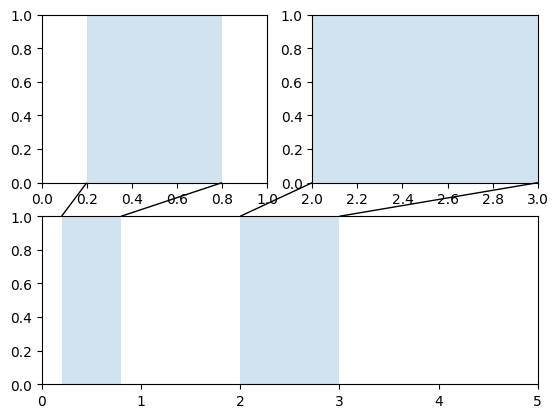

In [5]:
axs = plt.figure().subplot_mosaic([
    ["zoom1", "zoom2"],
    ["main", "main"],
])

axs["main"].set(xlim=(0, 5))
zoom_effect_1(axs["zoom1"], axs["main"], 0.2, 0.8)
axs["zoom2"].set(xlim=(2, 3))
zoom_effect_2(axs["zoom2"], axs["main"])

plt.show()